<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_01_g_h_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import math

import numpy as np

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

from ipywidgets import fixed, interact
import ipywidgets as widgets


## My cut at the exercises from
https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb

In [18]:
def data_and_noise(x0 = 0, v = 2, a = 0, std = 1, count = 30, seed = 123):
  np.random.seed(seed)

  xs = np.array([x0 + t * v + 0.5 * a * t ** 2 for t in range(count)])
  noise = np.array(np.random.normal(0, std, count))
  return (xs, xs + noise)
  

In [19]:
def g_h_filter(zs, x0, v0, g, h, dt):
  x = x0
  v = v0

  estimates = []
  for z in zs:
    predicted_x = x + v * dt

    residual = z - predicted_x
    x = predicted_x + g * residual
    v = v + h * residual / dt

    estimates.append(x)

  return np.array(estimates)



In [20]:
def show_scenario(g, h, x0, data_x0, data_v0, data_a0, data_std):
  actuals, weights = data_and_noise(x0=data_x0, v=data_v0, a=data_a0, std=data_std)
  estimates = g_h_filter(weights, x0, 0, g, h, 1)

  burn_in = 6
  measurement_error = weights[burn_in:] - actuals[burn_in:]
  estimate_error = estimates[burn_in:] - actuals[burn_in:]
  estimate_advantage = np.abs(measurement_error) - np.abs(estimate_error)
  mean_advantage = np.mean(estimate_advantage)

  # everything together
  _, subplots = plt.subplots(1,2, figsize=(9, 7), constrained_layout=True)
  subplots[0].plot(actuals, '-b', label='Actual')
  subplots[0].plot(weights, 'c.', label='Measurements')
  subplots[0].plot(estimates, '--gx', label='Estimates')
  subplots[0].set_title('g: {}'.format(g))
  subplots[0].set_ylim(bottom=0, top=200)
  subplots[0].legend()

  # advantage
  burnt_times = range(burn_in, len(estimates))
  subplots[1].plot(burnt_times, estimate_advantage, 'go')
  subplots[1].set_xlim(left=0)
  subplots[1].hlines(0, burn_in, len(estimates))
  subplots[1].set_title('Estimate advantage %.1f' % mean_advantage)
  
  plt.show()

In [21]:
interact(show_scenario,
         g=widgets.FloatSlider(0.5, min=0., max=1.),
         h=widgets.FloatSlider(0.5, min=0., max=1.),
         x0=widgets.IntSlider(25, min=0, max=200),
         data_x0=fixed(100),
         data_v0=widgets.IntSlider(2, min=0, max=5),
         data_a0=widgets.FloatSlider(0., min=0., max=1.),
         data_std=widgets.IntSlider(8, min=0, max=25))

interactive(children=(FloatSlider(value=0.5, description='g', max=1.0), FloatSlider(value=0.5, description='h'…

<function __main__.show_scenario>

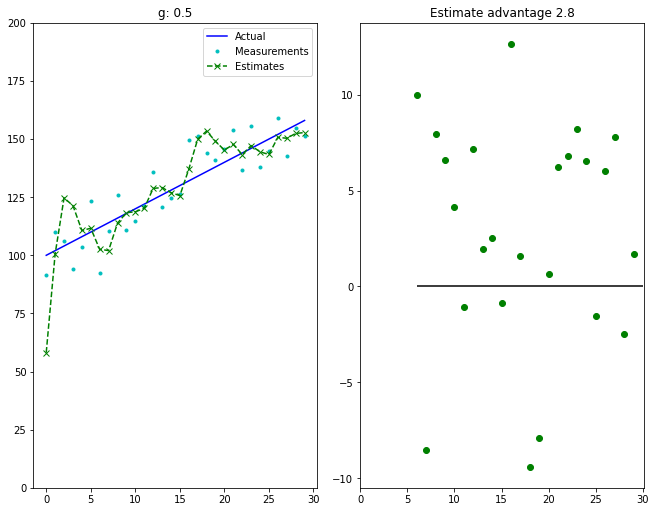

In [22]:
show_scenario(g=0.5, h=0.5, x0=25, data_x0=100, data_v0=2, data_a0=0, data_std=8)